<div class="alert alert-block alert-info">
    
<h1 style="color:Blue;"> <center> <ins> <b> 
Métodos Numéricos - Projeto Final 
</b> </ins> </center> </h1>
    
<h2 style="color:Blue;"> <center> <b> 
Análise de Imagens Biomédicas
</b></center> </h2>

<h4 style="color:Blue;"> <center> <b> 
Parte 2: Uso de Máscaras e Filtros em Imagens Biomédicas
</b></center> </h4>

<h4 style="color:Blue;"> <center> <b> 
Jhonatan Pereira</b></center> </h4>
    
</div>

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info" style="color:Blue;" id="parte1">
Introdução
</div>

Nesta parte discutiremos a aplicação de máscaras e filtros à imagens biomédicas, duas técnicas que enfatizam características importantes nas imagens. Para aproveitá-los bem, você deve ter uma compreensão completa da distribuição dos valores de intensidade de seus dados.

Os blocos de construção de imagens médicas são pixels e voxels. Cada um desses elementos tem duas propriedades: um valor de intensidade e uma localização no espaço. O significado do valor de intensidade depende da modalidade de imagem. Por exemplo, os pixels numa imagem de raio-x, ou radiografia, são mais brilhantes em tecidos densos, como o osso, porque absorvem mais radiação do que outros tipos.

Vamos começar observando uma radiografia de mão de uma competição da Radiological Society of North America de 2017. A absorção de raios X é maior em tecidos densos, como o osso, de modo que as intensidades resultantes devem ser altas. Consequentemente, imagens como essa podem ser usadas para prever a "idade óssea" em crianças.

Para começar, vamos carregar a imagem e verificar sua faixa de intensidade. O tipo de dados da imagem determina o intervalo de intensidades possíveis: por exemplo, inteiros sem sinal de 8 bits (uint8) podem assumir valores no intervalo de 0 a 255. Uma barra de cores pode ser útil para conectar esses valores à imagem visualizada.

In [3]:
im = imageio.imread("../datasets/hand_xray.jpg")
print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

Data type: uint8
Min. value: 0
Max value: 255


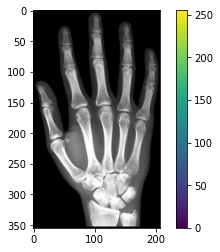

In [4]:
plt.imshow(im, vmin=0, vmax=255)
plt.colorbar()

Se quisermos ver como ums escala de cinza, basta fazer

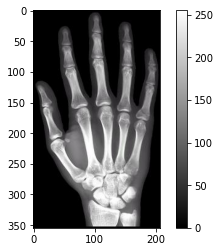

In [5]:
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.colorbar()

O intervalo de valores permitidos em uma imagem é determinado por seu tipo de dados. Geralmente, os inteiros de bits mais baixos são preferidos para imagens, pois o uso de memória aumenta drasticamente para tipos de dados maiores. Se todos os valores na imagem forem positivos, os inteiros sem sinal podem cobrir o maior intervalo de valores enquanto ocupam a menor quantidade de memória. Normalmente, você verá imagens dimensionadas pelo valor 255, que é o valor máximo para inteiros sem sinal de 8 bits. Você pode ver a diferença no uso de memória chamando o atributo size da matriz. O raio-x que acabamos de ver é lido pelo ImageIO como um inteiro sem sinal de 8 bits. 

---

__Tarefa 1:__ Converta a imagem carregada anteriormente para int64 e compare a quantidade de memória utilizada entre a imagem antes e depois da conversão. 

---

In [11]:
img_int64 = np.int64(im)


In [12]:
from sys import getsizeof

print(getsizeof(im))
print(getsizeof(img_int64))

160
1755280


Para sumarizar a informação contida na distribuição dos valores de intensidade em uma imagem, podemos usar histogramas (_sim, os mesmo histogramas de estatística!_). Eles agrupam cada pixel por seu valor e, em seguida, contam a ocorrência em cada classe (_bin_). SciPy, e especialmente seu módulo Ndimage, contém algumas ferramentas essenciais para análise de imagens. Vamos nos aprofundar no SciPy ao longo deste curso. Para gerar um histograma para a radiografia do pé, primeiro importamos o módulo Ndimage do SciPy como ndi. Então, chamamos ndimage dot histogram() e passamos nosso array. A função histogram() exige que especifiquemos valores para o mínimo, máximo e o número de compartimentos. Como nossa imagem é um inteiro sem sinal de 8 bits, nosso intervalo é de 0 a 255, com 256 valores possíveis. Isso retorna um vetor de 256 elementos com a contagem de pixels em cada valor de intensidade. Traçar os dados como um gráfico de linha revela uma distribuição altamente assimétrica, com muitos valores baixos e uma faixa mais ampla de valores altos.

In [6]:
import scipy.ndimage as ndi 

Vamos criar um histograma com valores acontecendo entre o mínimo 0 e o máximo 255, com 256 classes 9uma para cada valor específico).

In [7]:
hist = ndi.histogram(im, min =0, max=255, bins=256)
hist

array([84339,  2904,  2653,  1377,   921,   649,   364,   286,   229,
         197,   178,   182,   152,   171,   150,   160,   157,   129,
         143,   118,   141,   123,   117,   109,   110,   145,   116,
         178,   206,   164,   223,   187,   201,   243,   273,   452,
         552,   735,   807,   944,  1208,  1256,  1319,  1428,  1281,
        1359,  1168,  1212,  1145,  1024,   876,   823,   760,   844,
         717,   756,   674,   634,   669,   631,   593,   553,   597,
         600,   580,   591,   598,   582,   544,   634,   618,   598,
         667,   570,   638,   625,   614,   696,   696,   781,   749,
         783,   723,   749,   744,   642,   654,   558,   517,   558,
         535,   588,   611,   552,   534,   598,   592,   545,   632,
         506,   581,   594,   625,   600,   608,   625,   558,   595,
         579,   553,   639,   607,   606,   528,   667,   616,   629,
         625,   557,   602,   676,   559,   525,   553,   571,   537,
         605,   600,

Vamos calcular a distribuição acumulada, que nos dará outra percepção da distribuição desses valores.

In [8]:
cdf = hist.cumsum() / hist.sum()

e finalmente, vamos plotar as duas juntas

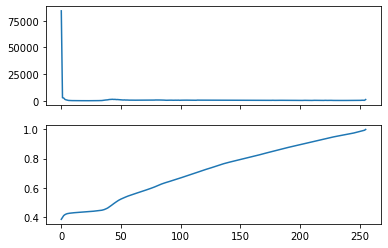

In [9]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histograma')
axes[1].plot(cdf, label='CDF')

---

__Tarefa 2:__ Gere os gráficos anteriores para a imagem convertida para int64 e comente as possíveis diferença entre eles. 

---

In [13]:
hist = ndi.histogram(img_int64, min =0, max=255, bins=256)
hist

array([84339,  2904,  2653,  1377,   921,   649,   364,   286,   229,
         197,   178,   182,   152,   171,   150,   160,   157,   129,
         143,   118,   141,   123,   117,   109,   110,   145,   116,
         178,   206,   164,   223,   187,   201,   243,   273,   452,
         552,   735,   807,   944,  1208,  1256,  1319,  1428,  1281,
        1359,  1168,  1212,  1145,  1024,   876,   823,   760,   844,
         717,   756,   674,   634,   669,   631,   593,   553,   597,
         600,   580,   591,   598,   582,   544,   634,   618,   598,
         667,   570,   638,   625,   614,   696,   696,   781,   749,
         783,   723,   749,   744,   642,   654,   558,   517,   558,
         535,   588,   611,   552,   534,   598,   592,   545,   632,
         506,   581,   594,   625,   600,   608,   625,   558,   595,
         579,   553,   639,   607,   606,   528,   667,   616,   629,
         625,   557,   602,   676,   559,   525,   553,   571,   537,
         605,   600,

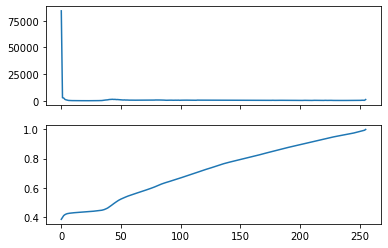

In [14]:
cdf = hist.cumsum() / hist.sum()
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histograma int64')
axes[1].plot(cdf, label='CDF int64')

Distribuições distorcidas são comuns em imagens médicas: as intensidades de fundo geralmente são baixas e ocupam muito espaço na imagem, e isso pode ser enxergado nos histogramas. 

Existem maneiras de modificar a distribuição de intensidade. Por exemplo, a equalização do histograma redistribui valores com base em sua abundância na imagem. Podemos realizar a equalização com o auxílio da função de distribuição cumulativa, que mostra a proporção de pixels que se enquadram em um determinado intervalo. Aqui, podemos ver que cerca de metade dos pixels tem valores menores que 32 (veja o gráfico da distribuição cumulativa). Para equalizar a imagem, poderíamos redistribuir esses valores de intensidade até que eles sejam representados de forma mais uniforme.

Equalizar o histograma é realmente bastante simples. Primeiro, geramos o histograma. Em seguida, calculamos a função de distribuição cumulativa tomando a soma contínua do histograma e dividindo-a pelo número total de pixels. Em seguida, aplicamos a função à nossa imagem e redimensionamos em 255. Plotar a imagem original e equalizada mostra que aumentamos as intensidades de pixel para várias áreas. 

---

__Tarefa 3:__ Gere uma versão equalizada da imagem anterior, plotando-a junto com a original e comentando as diferenças.  

---

In [15]:
import cv2

img = cv2.imread('datasets/hand_xray.jpg', 0)
equ = cv2.equalizeHist(img)
res = np.stack((img,equ),axis=0)

[ WARN:0@0.025] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('datasets/hand_xray.jpg'): can't open/read file: check file path/integrity


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ii in range(2):
    im = res[ii,:,:]
    axes[ii].imshow(im, cmap='gray')    
plt.show()

<div class="alert alert-block alert-info" style="color:Blue;" id="parte1">
Máscaras
</div>

Há situações em que a equalização global, isto é, realizada na imagem inteira acaba acarretando alguns problemas. Um vez que destacamos os pixels que julgamos mais importantes, acabamos também dando destaque a pixels de partes periféricas e menos importantes da imagem, podendo deixar sua interpretação comprometida. 

Você pode restringir sua análise apenas às partes mais importantes de uma imagem criando e aplicando máscaras de imagem.

Uma máscara é um array booleano que serve como uma tela para remover pixels indesejáveis. As máscaras devem manter as mesmas dimensões da imagem original para que as duas possam ser sobrepostas.

Uma maneira de criar máscaras é encontrar todos os pixels em uma imagem que satisfaçam uma determinada condição. Por exemplo, pode-se criar uma matriz de três por três de valores ascendentes. Se testarmos valores maiores que 5, retornaremos um array de três por três onde os valores são True quando maiores que 5 e False quando são menores. As operações lógicas incluem comparações e testes de equivalência. Você também pode encadear operações para selecionar um intervalo específico de pixels.

Vamos ver isso em ação. Lembre-se de que a radiografia do pé com a qual trabalhamos tem uma distribuição de intensidade como esta. Vemos que há uma queda acentuada em torno de 32, então vamos selecionar valores maiores que isso. Isso parece fazer um bom trabalho destacando o pé.

Primeiro, vamos criar as máscaras e ver como elas ficam.

Vamos começar criando uma máscara para os ossos.


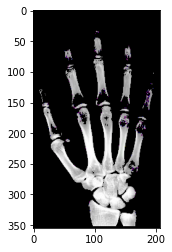

In [26]:
im_bone = np.where(im >= 145, im, 0)
plt.imshow(im_bone, cmap='gray')

e para a pele

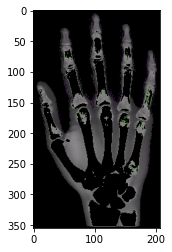

In [27]:
im_skin = np.where((im>=45)&(im<145), im, 0)
plt.imshow(im_skin, cmap='gray')

As máscaras podem ser usadas para filtrar imagens, permitindo que os valores originais passem, exceto onde a máscara for avaliada como False. A função `where()` do NumPy é útil para esse propósito. `where()` aplica uma condição em cada pixel e, em vez de retornar um booleano, retorna x quando True e y quando False. Cada um dos argumentos pode ser arrays ou valores únicos, permitindo grande flexibilidade. Vamos tentar filtrar os pixels que não fazem parte do osso. Chamaremos "onde im for maior que 64, retorne im, caso contrário retorne 0". Plotar a imagem mascarada mostra que apenas os valores de alta intensidade permanecem, e estes são principalmente osso.

---

__Tarefa 4:__ Considere a imagem `hand_xray_coracao.jpg`, crie uma máscara para pele e outra para ossos e mostre a diferença nos histogramas de cada máscara e da imagem original, comentando os resultados. 

---

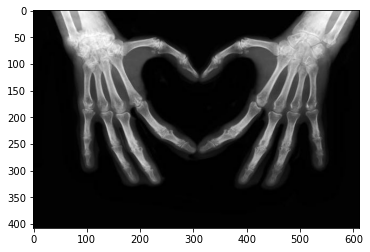

In [17]:
im_coracao = imageio.imread("../datasets/hand_xray_coracao.jpg")
plt.imshow(im_coracao, cmap='gray')

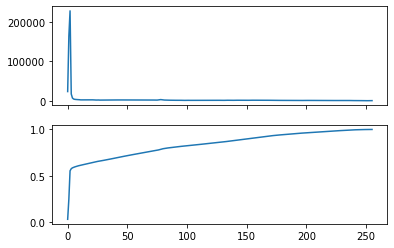

In [18]:
hist_oringin = ndi.histogram(im_coracao, min=0, max=255, bins=256)
cdf_origin = hist_oringin.cumsum() / hist_oringin.sum()
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist_oringin, label='Histograma')
axes[1].plot(cdf_origin, label='CDF')

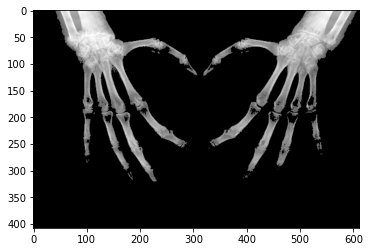

In [19]:
im_coracao_bone = np.where(im_coracao >= 96, im_coracao, 0)
plt.imshow(im_coracao_bone, cmap='gray')

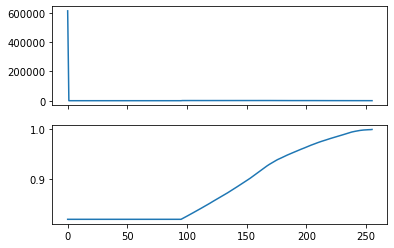

In [20]:
hist_bone = ndi.histogram(im_coracao_bone, min=0, max=255, bins=256)
cdf_bone = hist_bone.cumsum() / hist_bone.sum()
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist_bone, label='Histograma')
axes[1].plot(cdf_bone, label='CDF')

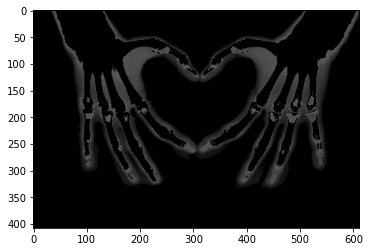

In [21]:
im_coracao_skin = np.where((im_coracao>=15)&(im_coracao<96), im_coracao, 0)
plt.imshow(im_coracao_skin, cmap='gray')

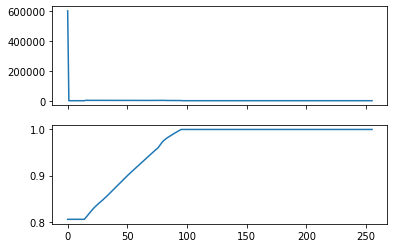

In [22]:
hist_skin = ndi.histogram(im_coracao_skin, min=0, max=255, bins=256)
cdf_skin = hist_skin.cumsum() / hist_skin.sum()
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist_skin, label='Histograma')
axes[1].plot(cdf_skin, label='CDF')

Os dados são ruidosos, então suas máscaras raramente serão perfeitas. Felizmente, existem maneiras simples de melhorá-los. Para aumentar o tamanho da sua máscara, você pode adicionar pixels ao redor das bordas, um processo conhecido como dilatação. Isso pode ajudar quando as bordas estiverem confusas ou para garantir que você não mascare acidentalmente pixels com os quais realmente se importa. Para fazer isso, chamamos a função binary_dilatation(), que converte todos os pixels de fundo adjacentes à máscara em pixels de máscara.

A operação oposta, "erosão binária" pode ser implementada da mesma maneira. Use-o para cortar a máscara em seus pixels mais centrais. Você pode executar essas operações de ajuste muitas iterações para tornar sua máscara muito maior ou menor. Você também pode combinar as operações para abrir ou fechar orifícios em sua máscara.

Máscaras imperfeitas podem ser ajustadas através da adição e subtração de pixels. O submódulo `ndimage` do SciPy inclui vários métodos úteis para atingir esses objetivos. Esses incluem:

*   `binary_dilation`: Adicione pixels ao longo das bordas
*   `binary_erosion`: Remove pixels ao longo das bordas
*   `binary_opening`: Erode e depois dilata, "abrindo" áreas próximas às bordas
*   `binary_closing`: dilata e depois erode, "preenchendo" buracos

---

__Tarefa 5:__ Verifique o efeito desses quatro ajustes nas máscaras criadas para ossos nas duas imagens de raio x que trabalhamos até aqui.

---

In [23]:
from scipy.ndimage import binary_dilation, binary_erosion, binary_opening, binary_closing

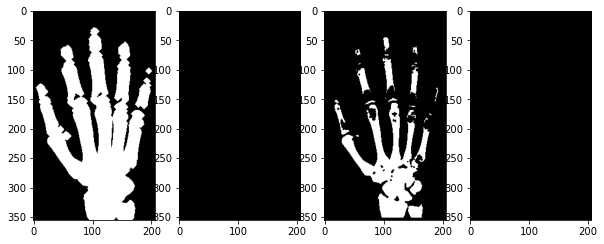

In [28]:
bin_dil_bone = binary_dilation(im_bone)

im_bone_dilate = ndi.binary_dilation (im_bone, iterations=5)
im_bone_erosion = ndi.binary_erosion(im_bone, brute_force=True)
im_bone_opening = ndi.binary_opening(im_bone, iterations=1)
im_bone_closed = ndi.binary_closing (im_bone, brute_force=True)

fig, axes = plt.subplots(1,4, figsize=(10,8))
axes[0].imshow(im_bone_dilate[:,:,0:1], cmap='gray')
axes[1].imshow(im_bone_erosion[:,:,0], cmap='gray')
axes[2].imshow(im_bone_opening[:,:,0:1], cmap='gray')
axes[3].imshow(im_bone_closed[:,:,0], cmap='gray')

In [30]:
im_coracao = imageio.imread("../datasets/hand_xray_coracao.jpg")
im_coracao = im_coracao >= 70

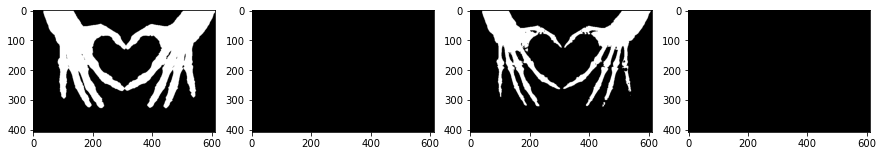

In [31]:
im_coracao_dilate = ndi.binary_dilation (im_coracao, iterations=5)
im_coracao_erosion = ndi.binary_erosion(im_coracao, brute_force=True)
im_coracao_opening = ndi.binary_opening(im_coracao, iterations=1)
im_coracao_closed = ndi.binary_closing (im_coracao, brute_force=True)

fig, axes = plt.subplots(1,4, figsize=(15,8))
axes[0].imshow(im_coracao_dilate[:,:,0:1], cmap='gray')
axes[1].imshow(im_coracao_erosion[:,:,0], cmap='gray')
axes[2].imshow(im_coracao_opening[:,:,0:1], cmap='gray')
axes[3].imshow(im_coracao_closed[:,:,0], cmap='gray')

<div class="alert alert-block alert-info" style="color:Blue;" id="parte1">
Filtros
</div>

Até agora, consideramos apenas as imagens como um todo. No entanto, você pode combinar informações espaciais e de intensidade empregando filtros convolucionais.

Dois exemplos comuns de filtragem são suavização e nitidez. A suavização enfatiza padrões de grande intensidade em uma imagem, reduzindo a variabilidade entre pixels vizinhos. Essencialmente, ele suprime o ruído desfocando a imagem. A nitidez da imagem é o oposto: as mudanças nítidas são aprimoradas, exagerando as diferenças entre os pixels. Vejamos mais de perto como isso é feito.

Vamos entender o funcionamento de um filtro convolucional. Considere uma matriz de entrada de cinco por cinco, onde todos os valores são um, exceto o valor central de 2. Para obter um valor mais nítido para o pixel central, primeiro definimos um conjunto de pesos de filtro, também chamado de kernel. Em seguida, selecionamos uma janela de dados de entrada do mesmo tamanho do nosso kernel. Nesse caso, o filtro pesará muito o pixel central e diminuirá o peso dos pixels adjacentes.

Para realizar a convolução, multiplicamos essas duas matrizes elemento a elemento e depois as somamos. No canto superior esquerdo, temos um valor de entrada de 1 vezes um peso de 0, um valor de entrada de 1 vezes um peso de 1 negativo e assim por diante. Em seguida, somamos todos esses produtos para obter um valor novo e aprimorado para o pixel central de nossa imagem de entrada. Neste caso, foi aumentado de dois para seis.

Vamos ver como isso funciona em uma imagem em tamanho real. À esquerda está uma matriz 2D aleatória; à direita, temos uma imagem de saída vazia que criaremos. No meio está o núcleo de afiação.

A partir do canto superior esquerdo da imagem de entrada, selecionamos os valores ao redor do pixel de origem. Em seguida, multiplicamos cada elemento nesta seleção pelos pesos do kernel e os somamos para obter o valor filtrado. Damos um passo para o próximo elemento, multiplicamos a janela de entrada pelo kernel e repetimos o processo para cada pixel na imagem. Isso resulta, neste caso, em uma imagem nítida.

O gif abaixo dá uma ideia visual dessa descrição.

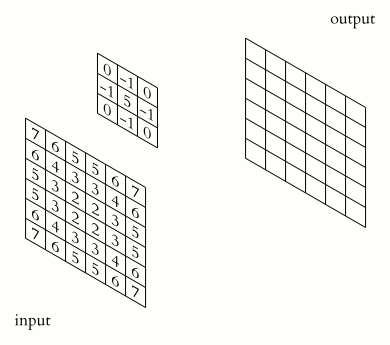

In [33]:
from IPython.display import Image
Image(filename="../datasets/ConvolutionGif.gif")

---

__Tarefa 5:__ O código abaixo mostra o efeito do filtro de convolução, como resultado da convolução entre uma matriz de pesos e a imagem, usando a função `convolve` do submódulo `NdImage` da scipy. Corrija o erro que está ocorrendo. Teste valores distintos para os pesos e veja o resultado sobre a filtragem.

---



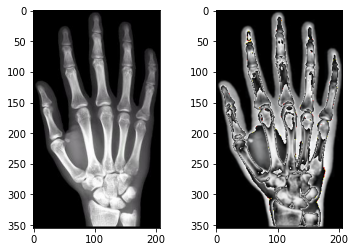

In [34]:
weights = np.ones((3,3,3), dtype=float) * 0.11

im_filt = ndi.convolve(im, weights)

fig, axes = plt.subplots(1,2)
axes[0].imshow(im)
axes[1].imshow(im_filt)

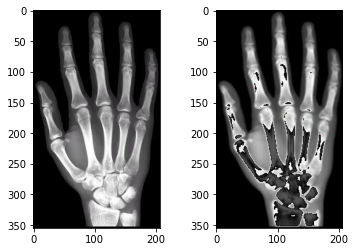

In [35]:
weights = np.ones((3,3,3), dtype=float) * 0.05

im_filt = ndi.convolve(im, weights)

fig, axes = plt.subplots(1,2)
axes[0].imshow(im)
axes[1].imshow(im_filt)

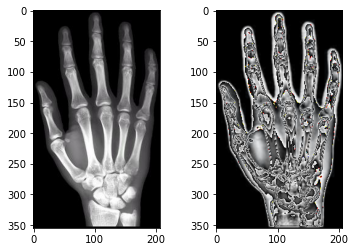

In [36]:
weights = np.ones((3,3,3), dtype=float) * 0.20

im_filt = ndi.convolve(im, weights)

fig, axes = plt.subplots(1,2)
axes[0].imshow(im)
axes[1].imshow(im_filt)

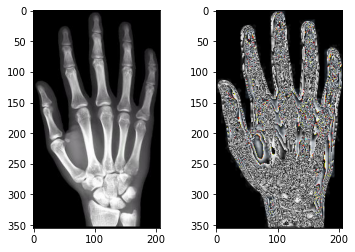

In [37]:
weights = np.ones((3,3,3), dtype=float)

weights[0] = weights[0] * np.random.random_sample(1)
weights[1] = weights[1] * np.random.random_sample(1)
weights[2] = weights[2] * np.random.random_sample(1)

im_filt = ndi.convolve(im, weights)

fig, axes = plt.subplots(1,2)
axes[0].imshow(im)
axes[1].imshow(im_filt)

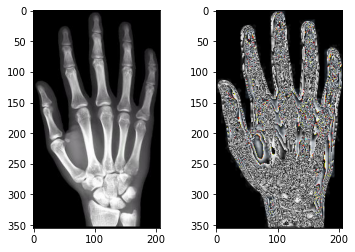

In [39]:
# Plot the images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im)
axes[1].imshow(im_filt)